# Laboratory Work: Chickenpox Propagation Prediction/Forecasting

- The objective of this Laboratry Work is to put in application time series data forecasting using a **Deep Neural Network**. For that it is nececssary to learn the model behind the time series data giving the relation between output, input, and their past and future values as given in the relation below:
$$y(k+p)=F(y(k),y(k-1),\ldots,y(k-d_y), u(k),u(k-1),u(k-2),\ldots,u(k-d_u))$$
where:
    - $y(k)$: is the output predicted signal
    - $u(k)$: is the input signal
    - $p$: is the prediction order
    - $d_y$: is the output memory/delay order or output prediction horizon 
    - $d_u$: is the input memory/delay order  or input prediction horizon 
- In our application  $p>0$, $d_u=0$ and $d_y>0$
- We will resolve this prediction problem by transforming the related recurrent Neural Network to a feedforword Neural Network and using the learning algorithms and tools provided by Keras toolbox. So if we consider that we have a learning base given by $u(k), y(k), k=1,2,\ldots, n $ we have to create one input signal from input learning base $u(k)$ and $d_y+1$ input signal coming from shifted in the past $y(k)$ signal. We can begin the prediction learning with $p=1$ and $d_y=9$ as given in the construction of learning base in section *Data Base*.
- **Work to be done**:
    - For different perdiction horizont $p\in{1,2,3}$ and memory/predictor order $d_y\in{7,8,9,10}$ propose a Neural Network  architecture, operate the learning phase, give the results of testing phase and make some conclusions wrt accuracy.
    - **Optional**: Propose an implementation of Back Propogation algorithm to operate the learning phase.
    - **Optional**: Propose other Neuronal Network architecture like SimpleRNN, GRU or LSTM to implement and operate the learning and compare your results with the feedforward architecture given above.
    - Genral conclusion
- **A report** on the Laboratory Work has to be written in **Jupyter** or in any other editor.
- **The report** as well as **Jupyter report and code** has to be uploaded to Blackboard  **before 15 of January 2021**  specifying the name of persons involved (**which has to be at maximun two**). The name of the persons involved has to be given in the report also.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from keras import models
from keras import layers
from keras import optimizers

plt.rcParams.update({'figure.max_open_warning': 0})


# Data Base
- The example trains an **Deep neural Network** to forecast the number of chickenpox cases, taken from the data set **chickenpox_dataset**, given the number of cases in previous months
- Load the example data from **data_chickenpox.txt** text file which contains a single time series, with time steps corresponding to months and values corresponding to the number of cases 
- Construct the input **Deep Neural Network** input w.r.t memory/predictor horizon (**$nn_0$**) ( 10 in our case)
- Split the data in **Training Set**, **Validation Set** and **Test Set**
- $nn_0$ gives the output prediction horizon or number of neurons in the input layer
- $nn_1$ gives the number of neurons in the hidden layer
- $nn_2$ gives the number of neurons in the output layer     

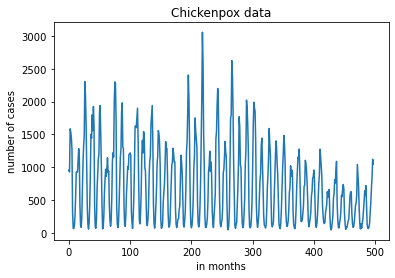

(498,)
(488, 9)
(488, 1)


In [2]:
S= np.loadtxt('data_chickenpox.txt')
n=len(S)
plt.plot(S)
plt.title('Chickenpox data')
plt.xlabel('in months')
plt.ylabel('number of cases')
plt.show()

p=2  # horizon de prediction
dy=8  # memoire de sortie

nn_0=dy+1                                                                     # Prediction order or number of neurons in the input layer
nn_1=10                                                                       # Number of neurons in the hidden layer
nn_2=1                                                                        # Number of neurons in the output layer     
y=S
print(S.shape)
# Input Signal Contruction

V=y[dy:len(y)-p,]
for i in range(1,dy+1):
    V= np.c_[V,y[dy-i:len(y)-p-i,]] 

T=np.mat(y[dy+p:len(y),]).T                                                         # Target Signal Contruction 

print(V.shape)
print(T.shape)

input_NN=V[:400,:]
target_NN=T[:400,]
input_Test=V[400:,:]
target_Test=T[400:,]

input_Val=input_Test
target_Val=target_Test


# Standardize Data
For a better fit and to prevent the training from diverging, standardize the training data to have zero mean and unit variance. Standardize the test data using the same parameters as the training data.

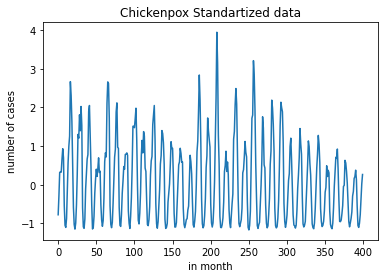

In [3]:
Standartize= True
S = np.loadtxt('data_chickenpox.txt')
if(Standartize):
    mu = np.mean(S)
    sig = np.std(S)
    input_NN = (input_NN - mu) / sig
    target_NN = (target_NN - mu) / sig
    plt.plot(target_NN)
    plt.title("Chickenpox Standartized data")
    plt.xlabel("in month")
    plt.ylabel("number of cases")
    input_Test = (input_Test - mu)/ sig
    target_Test = (target_Test-mu)/sig
    target_Val = target_Test

# Deep Neural Network Architecture
- Define the type of DNN: In our case we have chosen the **Sequential** DNN
- Define the type of activation function for each layer (**linear,relu,linear** in our case)
- Define the learning/optimization method used (**RMSprop** in our case)
- Define the criteria to minimize and the related metric (**MSE** and **'accuracy'** in our case)
- Define the **batch size** and the number of **epochs** (**batch_size=4, epochs=50** in our case)
- $nn_0$ gives the prediction horizon or number of neurons in the input layer
- $nn_1$ gives the number of neurons in the hidden layer
- $nn_2$ gives the number of neurons in the output layer     

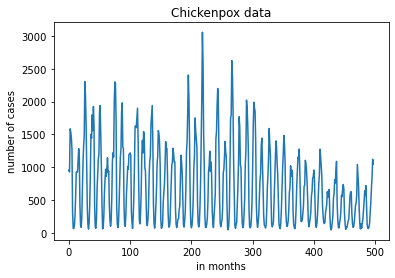

In [4]:
# Preparation du dataset
S= np.loadtxt('data_chickenpox.txt')
n=len(S)
plt.plot(S)
plt.title('Chickenpox data')
plt.xlabel('in months')
plt.ylabel('number of cases')
plt.show()


In [9]:
def construct_dataset(S,dy=7, p=1,nn_1=10,nn_2=1,train_size=400,standartize=True,printMessage=True):
    nn_0=dy+1
    nn_1=50
    nn_2=1
    y=S
    if(printMessage):
        print("Signal shape %d, \n"%S.shape,
          "Output order: %d \n"%dy,
          "Prediction horizon : %d, \n"%p,
          "Neural Net Layers : (%d, %d, %d),\n"%(nn_0,nn_1,nn_2)
         )
    
    #Input signal construction
    V=y[dy:len(y)-p,]
    for i in range(1,dy+1):
        V= np.c_[V,y[dy-i:len(y)-p-i,]] 

    T=np.mat(y[dy+p:len(y),]).T
    if(printMessage):
        print("Output memory (Neural net input) shape : ",V.shape)
        print("Traget signal (Neural net target) shape: ",T.shape)
    
    input_train=V[:400,:]
    target_train=T[:400,]
    input_Test=V[400:,:]
    target_Test=T[400:,]
    #input_Val = input_Test
    #target_Val = target_Test
    
    if(standartize):
        mu = np.mean(S)
        sig = np.std(S)
        input_train = (input_train - mu) / sig
        target_train = (target_train - mu) / sig
        
        
        input_Test = (input_Test - mu)/ sig
        target_Test = (target_Test-mu)/sig
        #target_Val = target_Test
        
    return input_train,target_train, input_Test, target_Test #, input_val, target_Val

def experiment(input_train, target_train, input_test, nn_0, nn_1,nn_2):
    model = models.Sequential();
    model.add(layers.InputLayer(input_shape=(nn_0,)))
    model.add(layers.Dense(nn_1, activation='relu'))
    model.add(layers.Dense(nn_2, activation='linear'))
    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss="mse",metrics=['accuracy'])
    
    log = model.fit(input_train,target_train,batch_size=4, epochs=50,verbose=0, validation_split=0.2)
    output_train = model.predict(input_train)
    output_test = model.predict(input_test)
    return output_train, output_test,log

def show_result(target_train, output_train, target_test, output_test, p, dy):
    plt.figure()
    plt.plot(target_train)
    plt.plot(output_train)
    plt.title('Sortie du training où p=%d, dy=%d' % (p, dy))
    plt.legend(( 'target','output'), loc="upper right")
    plt.xlabel( 'Mois')
    plt.ylabel( 'Nombre de cas')

    plt.figure()
    plt.plot(target_test)
    plt.plot(output_test)
    plt.title('Sortie du test ot p=%d, dy=%d' % (p, dy))
    plt.legend(('target','output'), loc='upper right')
    plt.xlabel('Mois')
    plt.ylabel('Nombre de cas')

# Test de fonctions

Signal shape 498, 
 Output order: 7 
 Prediction horizon : 1, 
 Neural Net Layers : (8, 10, 1),

Output memory (Neural net input) shape :  (490, 8)
Traget signal (Neural net target) shape:  (490, 1)


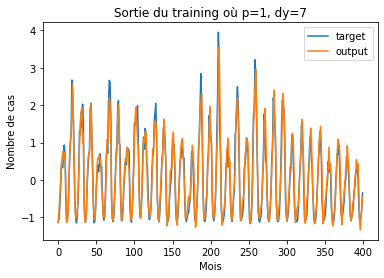

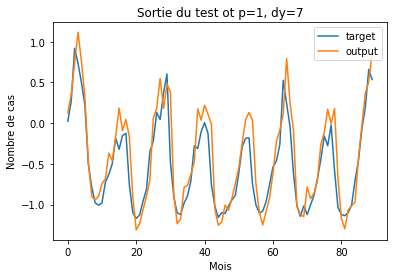

In [6]:
# definition des parammettre
p=1 # horizon de prediction
dy=7 # la memoire de sortie
nn_0=dy+1 #nombre de neurone dans la couche input
nn_1=100 # nombre de neurone dans la couche cacher
nn_2=1 # nombre de neurone dans la couche de sortie

# contruire input et target 
input_train,target_train, input_test, target_test = construct_dataset(S,dy,p)
output_train, output_test ,log = experiment(input_train,target_train,input_test,nn_0,nn_1,nn_2)
show_result(target_train, output_train, target_test, output_test, p, dy)

# Experimentation

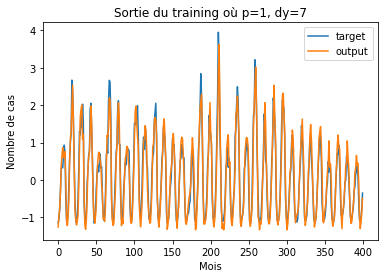

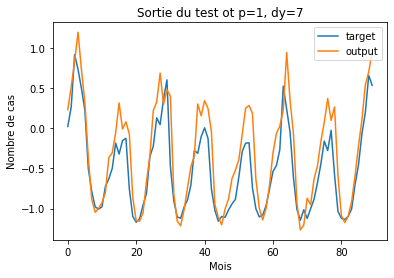

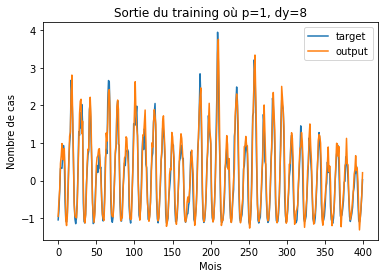

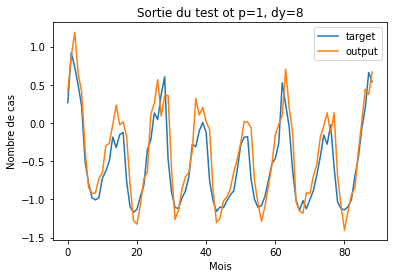

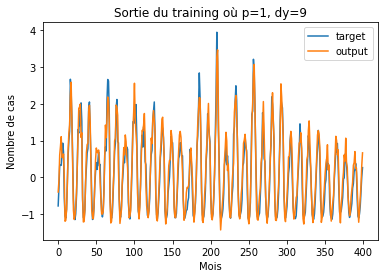

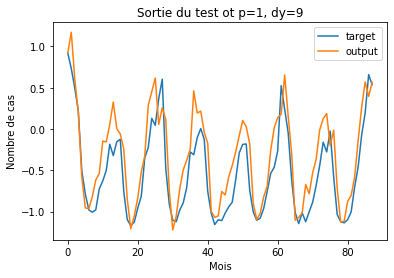

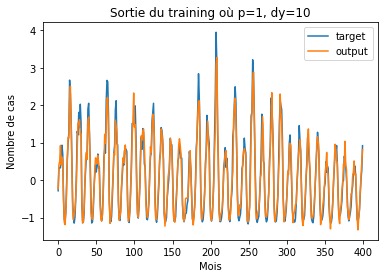

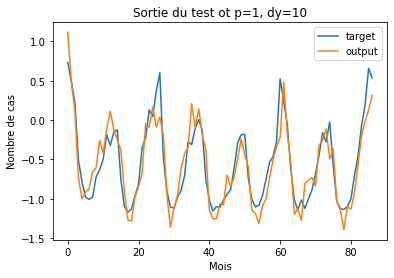

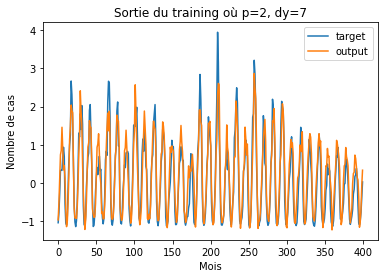

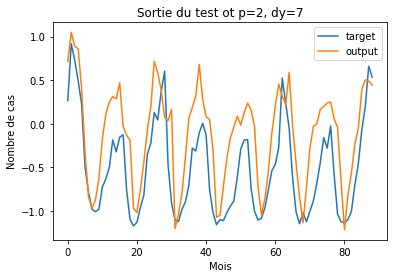

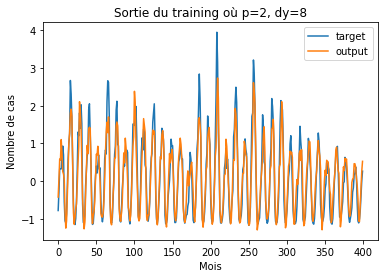

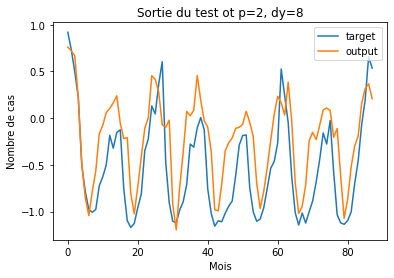

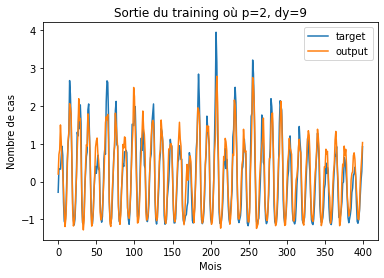

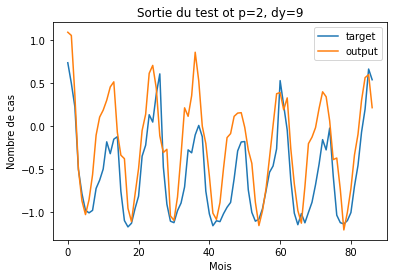

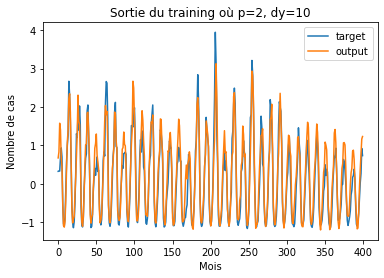

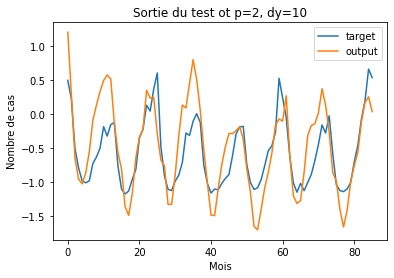

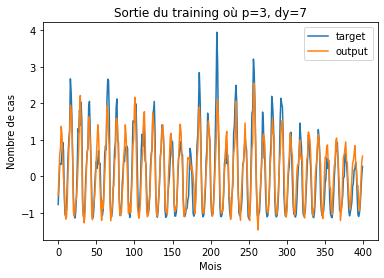

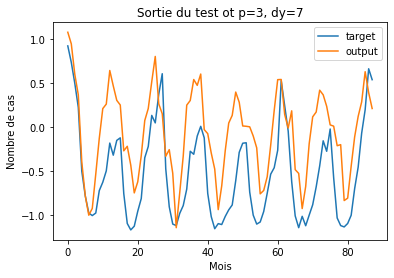

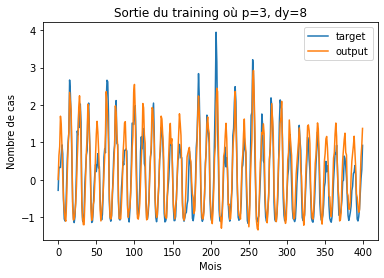

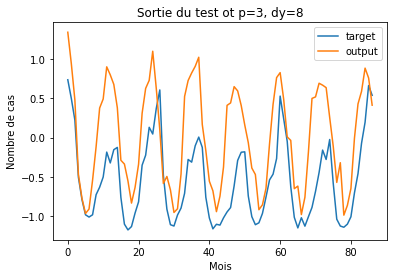

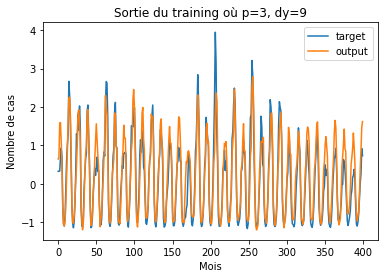

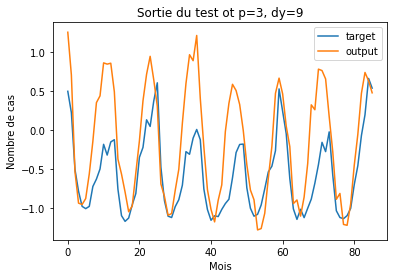

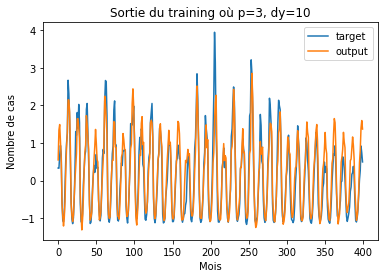

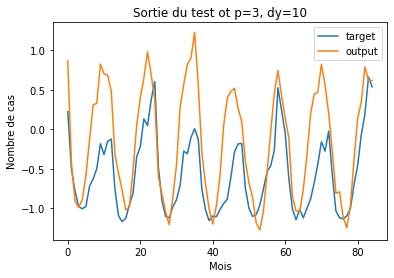

In [7]:
# definition des parammettre

nn_1=100 # nombre de neurone dans la couche cacher

# horizon de prediction
for p in range(1,4): 
    # la memoire de sortie
    for dy in range(7,11):
        nn_0=dy+1 #nombre de neurone dans la couche input
        
        input_train,target_train, input_test, target_test = construct_dataset(S,dy,p,nn_1,printMessage=False)
        output_train, output_test ,log = experiment(input_train,target_train,input_test,nn_0,nn_1,nn_2)
        show_result(target_train, output_train, target_test, output_test, p, dy)

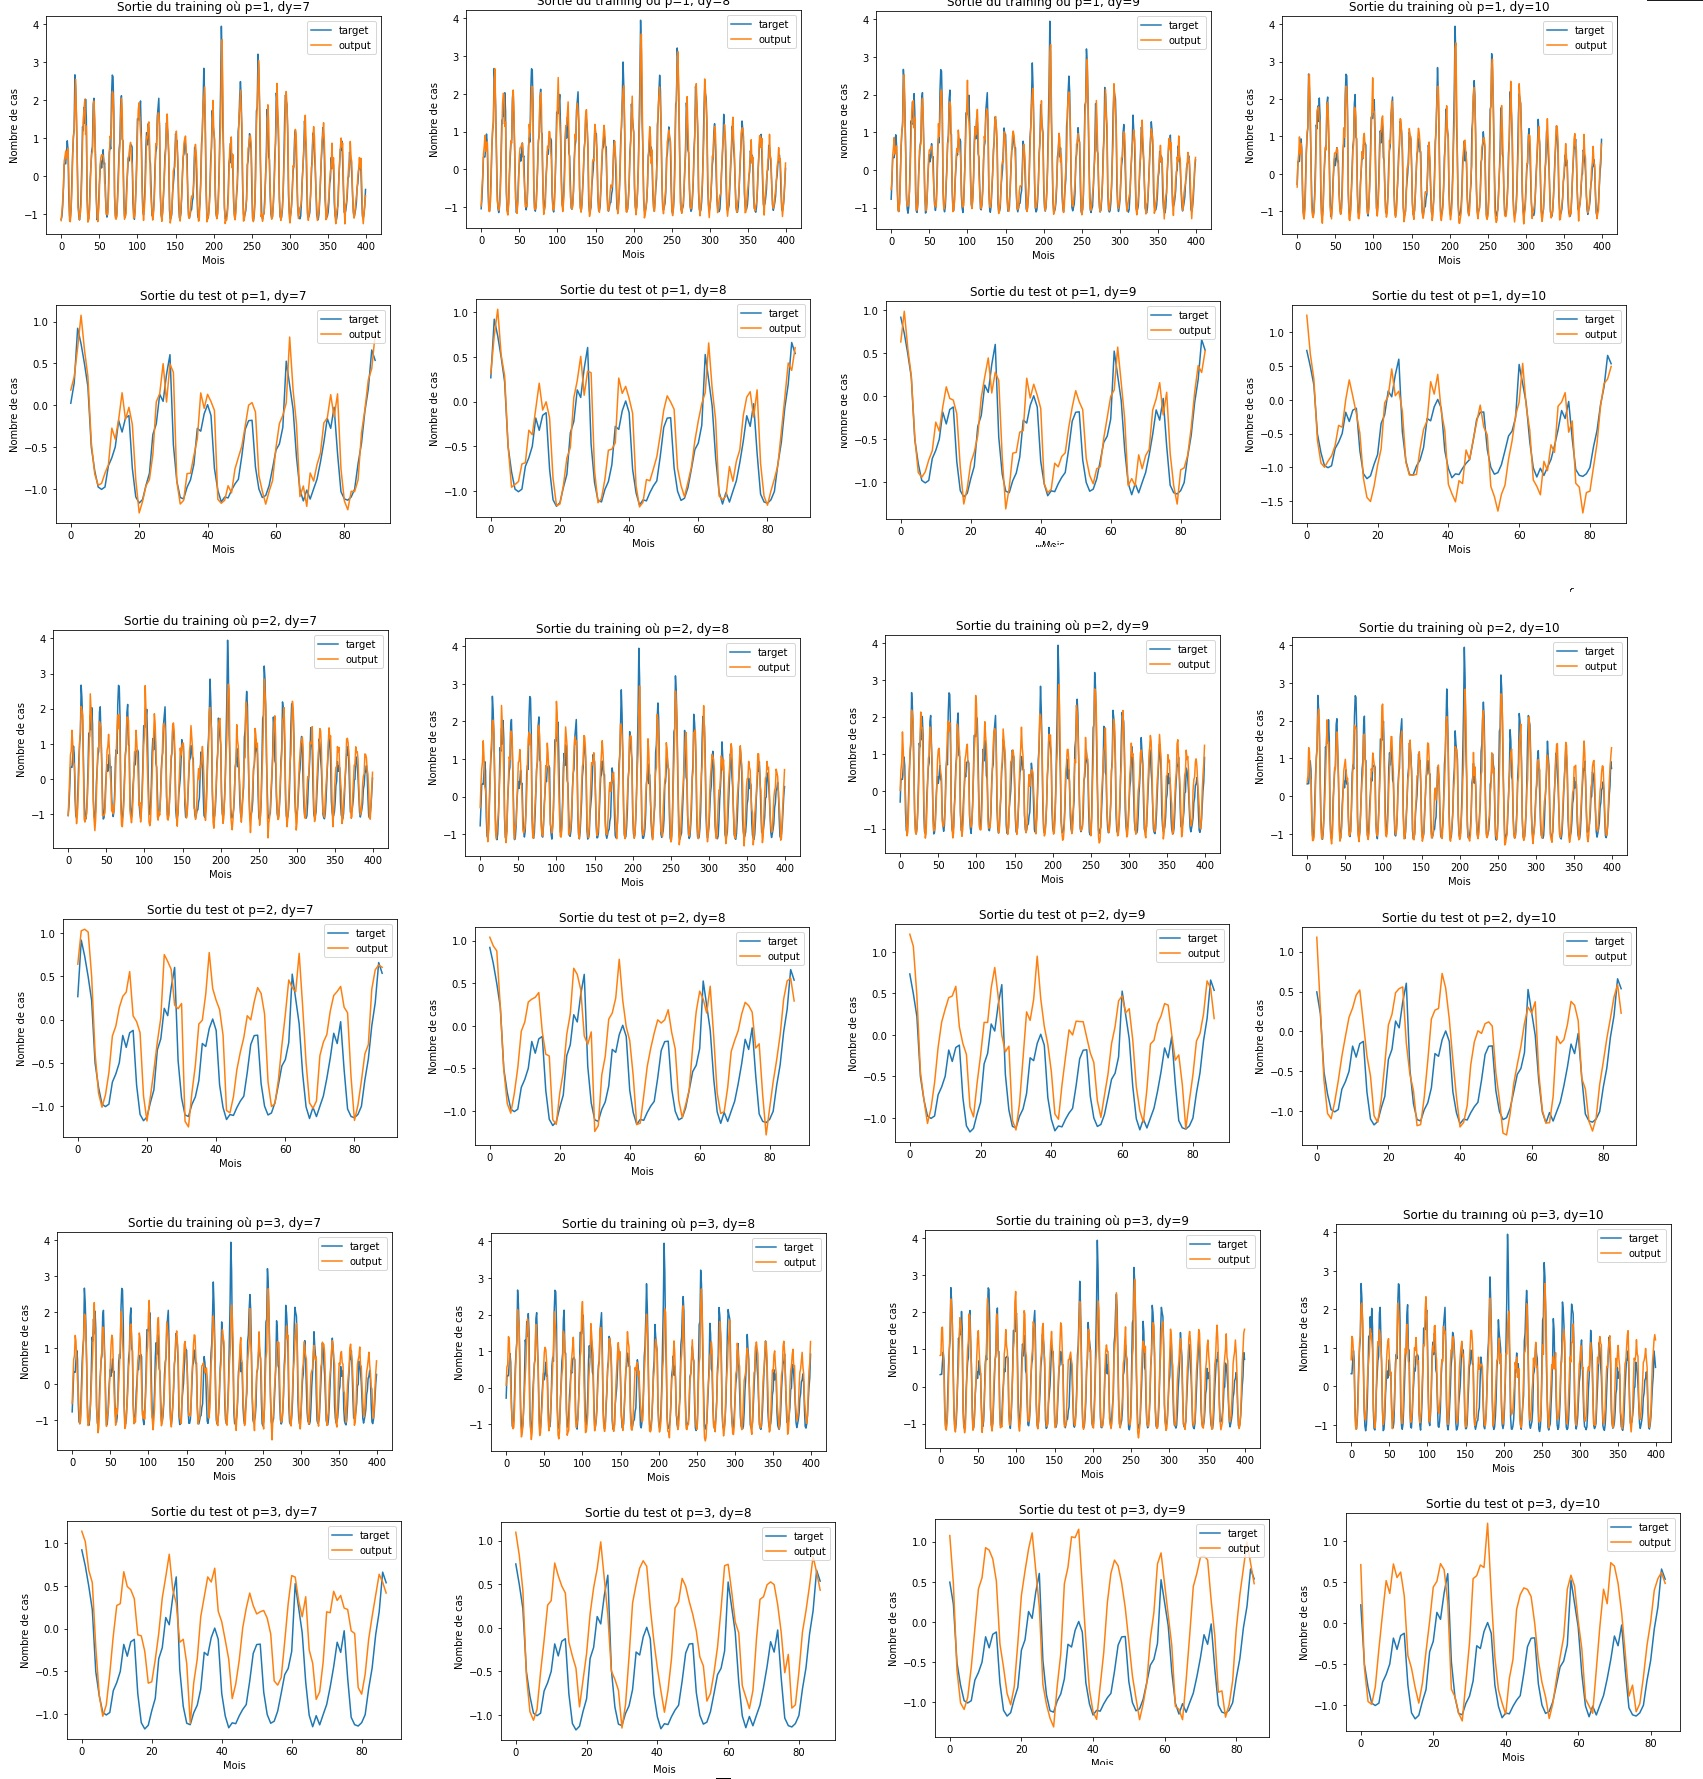

On peut observer qu'avec l'augmentation de la mémoire, les courbes d'output prennent davantages la même forme que le target (pointes) et avec l'augmentation de l'horizon de prédiction, la qualité de la prédiction des cas est moins précise. 
Elle estime généralement à la hausse les évolutions qui est moins précise par rapport à la réalité. Nous pouvons supposer que l'ajout de données régulierement permettrait de réduire cet aspect de dérivation. 